In [10]:
import glob, os
import cv2
import matplotlib.pyplot as plt
import numpy as np

Following two similar functions, extract_label and extract_label_alt, with only slight differences in how the filename is split and processed.

Functions extract specific information (subject ID, gender, left/right hand, and finger type) from an image filename. 
The filename follows a structured format, defined by the original SOCOFing dataset, where components are separated by underscores and double underscores. 
The functions split the filename into meaningful parts and convert string-based information (e.g., gender, hand, finger) into numerical labels for easier processing, for machine learning purposes.

In [12]:
def extract_label(img_path):
    """
    Extract subject ID, gender, hand (left/right), and finger type from image filename.

    Args:
        img_path (str): Path to the image file.

    Returns:
        np.ndarray: Array containing subject ID, gender (0: male, 1: female),
                    hand (0: left, 1: right), and finger (0-4 for thumb to little finger).
    """
    filename = os.path.splitext(os.path.basename(img_path))[0]
    
    subject_id, etc = filename.split('__')
    gender_str, hand_str, finger_str, _ = etc.split('_')

    gender = 0 if gender_str == 'M' else 1
    hand = 0 if hand_str == 'Left' else 1
    finger_map = {'thumb': 0, 'index': 1, 'middle': 2, 'ring': 3, 'little': 4}
    finger = finger_map.get(finger_str, -1)

    return np.array([subject_id, gender, hand, finger], dtype=np.uint16)


def extract_label_alt(img_path):
    """
    Similar to extract_label but extracts the filename using a different split format.
    
    Args:
        img_path (str): Path to the image file.

    Returns:
        np.ndarray: Array containing subject ID, gender, hand, and finger.
    """
    filename = os.path.splitext(os.path.basename(img_path))[0]
    
    subject_id, etc = filename.split('__')
    gender_str, hand_str, finger_str, *_ = etc.split('_')

    gender = 0 if gender_str == 'M' else 1
    hand = 0 if hand_str == 'Left' else 1
    finger_map = {'thumb': 0, 'index': 1, 'middle': 2, 'ring': 3, 'little': 4}
    finger = finger_map.get(finger_str, -1)

    return np.array([subject_id, gender, hand, finger], dtype=np.uint16)

The following code is designed to preprocess and prepare a dataset of fingerprint images for machine learning tasks. It specifically focuses on images from the "SOCOFing/Real" directory, which are assumed to contain real fingerprint images.

The code performs the following steps:

1. Loads and sorts the image files.
2. Pre-allocates arrays to store the images and their corresponding labels.
3. Iterates through each image, reads it, resizes it, and extracts its label.
4. Stores the processed images and labels in NumPy arrays.
5. Visualizes a sample image and its label for inspection.

The resulting processed dataset is saved as x_real.npy (images) and y_real.npy (labels), ready to be used for training or testing a machine learning model for fingerprint recognition or classification tasks.

6000


/Users/ivanivani/opt/anaconda3/lib/python3.9/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


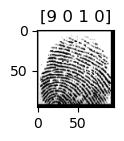

In [6]:
## Real pictures
 
# Load and sort the image paths
img_list = sorted(glob.glob('dataset/SOCOFing/Real/*.BMP'))
print(len(img_list))

# Pre-allocate arrays for images and labels
num_images = len(img_list)
image_shape = (96, 96)
label_shape = (4,)

imgs = np.empty((num_images, *image_shape), dtype=np.uint8)
labels = np.empty((num_images, *label_shape), dtype=np.uint16)

# Process images and extract labels
for i, img_path in enumerate(img_list):
    # Read the image in grayscale
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # Resize the image to a fixed size
    img = cv2.resize(img, image_shape)

    # Store the image in the imgs array
    imgs[i] = img

    # Extract the label from the image path
    labels[i] = extract_label(img_path)

# Save the processed data
np.save('dataset/x_real.npy', imgs)
np.save('dataset/y_real.npy', labels)

# Visualize a sample image and its label
plt.figure(figsize=(1, 1))
plt.title(labels[-1])
plt.imshow(imgs[-1], cmap='gray')
plt.show()

17931


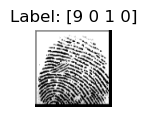

In [14]:
## Altered Pictures - Easy
 
# Define data path and target size
data_path = "dataset/SOCOFing/Altered/Altered-Easy/*.BMP"
target_size = (96, 96)

# Load image paths (sorted)
image_paths = sorted(glob.glob(data_path))

# Check for empty dataset
if not image_paths:
    raise ValueError("No images found in the specified path!")

# Pre-allocate arrays for efficiency
num_images = len(image_paths)
print(num_images)

images = np.empty((num_images, *target_size), dtype=np.uint8)
labels = np.empty((num_images, 4), dtype=np.uint16)

# Load images and labels
for i, image_path in enumerate(image_paths):
    # Load grayscale image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Resize image
    image = cv2.resize(image, target_size)

    # Store image and label
    images[i] = image
    labels[i] = extract_label_alt(image_path)  # Assuming extract_label_alt exists

# Save data
np.save("dataset/x_easy.npy", images)
np.save("dataset/y_easy.npy", labels)

# Display last image (optional)
plt.figure(figsize=(1, 1))
plt.title(f"Label: {labels[-1]}")  # Use f-string for clear formatting
plt.imshow(images[-1], cmap="gray")
plt.axis("off")  # Hide unnecessary axes for cleaner visualization
plt.show()

17067


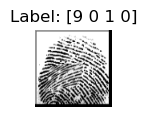

In [16]:
## Altered Pictures - Medium

# Define data path and target size
data_path = "dataset/SOCOFing/Altered/Altered-Medium/*.BMP"
target_size = (96, 96)

# Load image paths (sorted)
image_paths = sorted(glob.glob(data_path))

# Check for empty dataset
if not image_paths:
    raise ValueError("No images found in the specified path!")

# Pre-allocate arrays for efficiency
num_images = len(image_paths)
print(num_images)
images = np.empty((num_images, *target_size), dtype=np.uint8)
labels = np.empty((num_images, 4), dtype=np.uint16)

# Load images and labels
for i, image_path in enumerate(image_paths):
    # Load grayscale image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Resize image
    image = cv2.resize(image, target_size)

    # Store image and label
    images[i] = image
    labels[i] = extract_label_alt(image_path)  # Assuming extract_label_alt exists

# Save data
np.save("dataset/x_medium.npy", images)
np.save("dataset/y_medium.npy", labels)

# Display last image (optional)
plt.figure(figsize=(1, 1))
plt.title(f"Label: {labels[-1]}")  # Use f-string for clear formatting
plt.imshow(images[-1], cmap="gray")
plt.axis("off")  # Hide unnecessary axes for cleaner visualization
plt.show()

14272


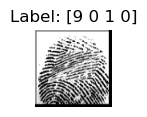

In [18]:
## Altered Pictures - Hard
 
# Define data path and target size
data_path = "dataset/SOCOFing/Altered/Altered-Hard/*.BMP"
target_size = (96, 96)

# Load image paths (sorted)
image_paths = sorted(glob.glob(data_path))

# Check for empty dataset
if not image_paths:
    raise ValueError("No images found in the specified path!")

# Pre-allocate arrays for efficiency
num_images = len(image_paths)
print(num_images)
images = np.empty((num_images, *target_size), dtype=np.uint8)
labels = np.empty((num_images, 4), dtype=np.uint16)

# Load images and labels
for i, image_path in enumerate(image_paths):
    # Load grayscale image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Resize image
    image = cv2.resize(image, target_size)

    # Store image and label
    images[i] = image
    labels[i] = extract_label_alt(image_path)  # Assuming extract_label_alt exists

# Save data
np.save("dataset/x_hard.npy", images)
np.save("dataset/y_hard.npy", labels)

# Display last image (optional)
plt.figure(figsize=(1, 1))
plt.title(f"Label: {labels[-1]}")  # Use f-string for clear formatting
plt.imshow(images[-1], cmap="gray")
plt.axis("off")  # Hide unnecessary axes for cleaner visualization
plt.show()